In [11]:
import platform
import sys
import os
import importlib

import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

if platform.system() == 'Darwin':
    base_FP = '/Users/hyunglokkim/Insync/hkim@geol.sc.edu/Google_Drive/'
else:
    base_FP = '/data'
sys.path.append(base_FP + '/python_modules')

import hydroAI.Plot as Plot
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [13]:
# Example of how to call the function
FP = base_FP + '/GIST/0.Lectures/2024_Spring/EN5423/datasets/week02'
input_file = 'usgs-streamflow-nldas_hourly.nc'

# Open the NetCDF file
dataset = nc.Dataset(os.path.join(FP, input_file), mode='r')

# Print the variables
print("Variables in the NetCDF file:")
for var in dataset.variables:
    print(var)

Variables in the NetCDF file:
date
convective_fraction
longwave_radiation
potential_energy
potential_evaporation
pressure
shortwave_radiation
specific_humidity
temperature
total_precipitation
wind_u
wind_v
qobs_mm_per_hour
qobs_count
qualifiers
utcoffset_hours
rel_deviation_from_camels
qobs_CAMELS_mm_per_hour
basin


In [49]:
# Extract streamflow, precipitation, and time data
streamflow_data = dataset.variables['qobs_mm_per_hour'][0, :]
precipitation_data = dataset.variables['total_precipitation'][0, :]
times = nc.num2date(dataset.variables['date'][:], units="hours since 2000-01-01 00:00:00", calendar="proleptic_gregorian")

# Since direct conversion of cftime to pandas datetime might not work, let's do a workaround
# Convert cftime objects to strings and then to pandas datetime
time_strings = [str(time) for time in times]  # Convert cftime objects to strings
time_datetimes = pd.to_datetime(time_strings)  # Convert strings to pandas datetime objects

# Convert to pandas DataFrame
df = pd.DataFrame({'Streamflow': streamflow_data, 'Precipitation': precipitation_data.flatten()}, index=time_datetimes)

,Streamflow,Precipitation
2000-01-01 00:00:00,0.019569,0.0
2000-01-01 01:00:00,0.019569,0.0
2000-01-01 02:00:00,0.019330,0.0
2000-01-01 03:00:00,0.019092,0.0
2000-01-01 04:00:00,0.019092,0.0
...,...,...
2002-12-31 19:00:00,0.027683,0.0
2002-12-31 20:00:00,0.027683,0.0
2002-12-31 21:00:00,0.027683,0.0
2002-12-31 22:00:00,0.027683,0.0


In [51]:
# Resample to monthly values using the mean for streamflow and sum for precipitation
monthly_df = df.resample('M').agg({'Streamflow': 'mean', 'Precipitation': 'sum'})

,Streamflow,Precipitation
2000-01-31,0.034720,96.349121
2000-02-29,0.043868,43.731850
2000-03-31,0.025519,56.394218
2000-04-30,0.051690,113.057724
2000-05-31,0.023646,74.505379
2000-06-30,0.018863,116.474602
2000-07-31,0.014822,129.111404
2000-08-31,0.012303,95.573036
2000-09-30,0.016152,136.571182
2000-10-31,0.009068,0.892585


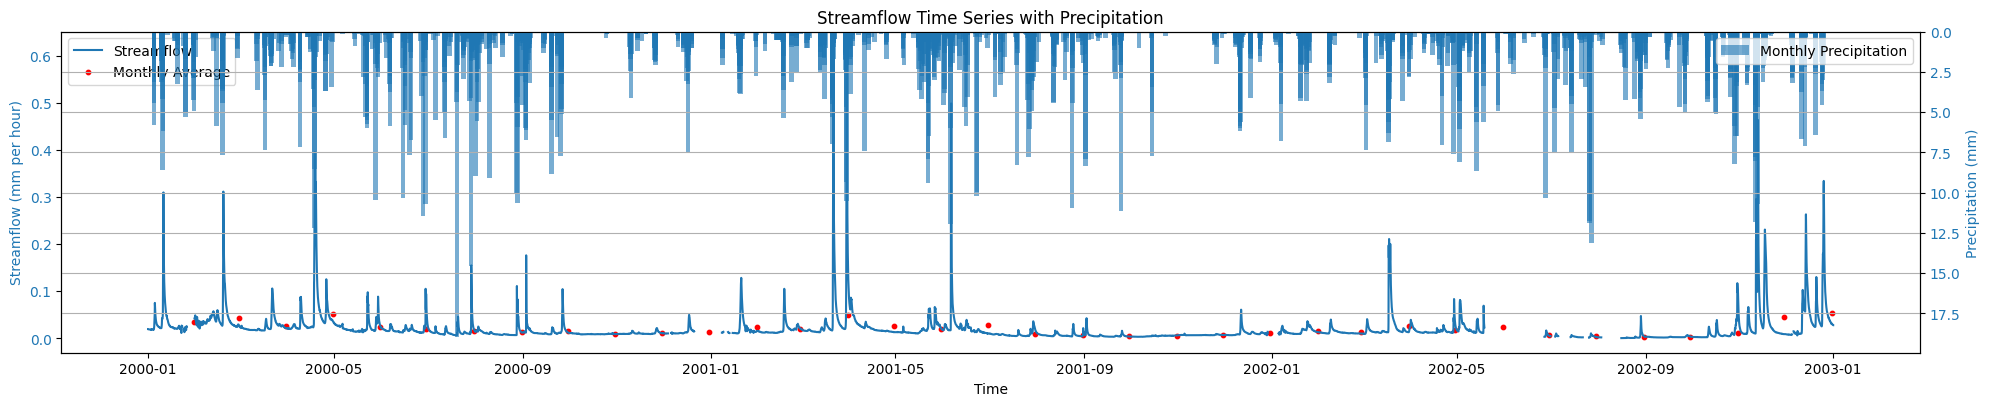

In [64]:
# Plot the time series data for streamflow
fig, ax1 = plt.subplots(figsize=(20, 4))

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Streamflow (mm per hour)', color=color)
ax1.plot(df.index, df['Streamflow'], label='Streamflow', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plot the monthly values as red dots
ax1.scatter(monthly_df.index, monthly_df['Streamflow'], color='red', s=10, label='Monthly Average')

# Create a second y-axis for the precipitation data
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Precipitation (mm)', color=color)  
ax2.bar(df.index, df['Precipitation'], width=3, label='Monthly Precipitation', color=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

# Invert the right y-axis
ax2.invert_yaxis()

fig.tight_layout()  # Adjust the layout to make room for the second y-axis
plt.title('Streamflow Time Series with Precipitation')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid()
plt.show()